In the beginning, we need to determine the base ring, the number of variables, the variables, and the term order to find the Gröbner bases. In the below, we give these to create the polynomial ring.

In [1]:
P.<x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16> = PolynomialRing (FiniteField(37), order ="lex")#(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16)

We choose a base ring as $Finite Field(37)$ because 37 is a prime number and the ring allows us to compute the ideal set correctly. We use the lexicographical term order for the monomial ordering and we have 16 variables. Now, we can import the polynomials.

In [2]:
ls = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16]; f = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]; 

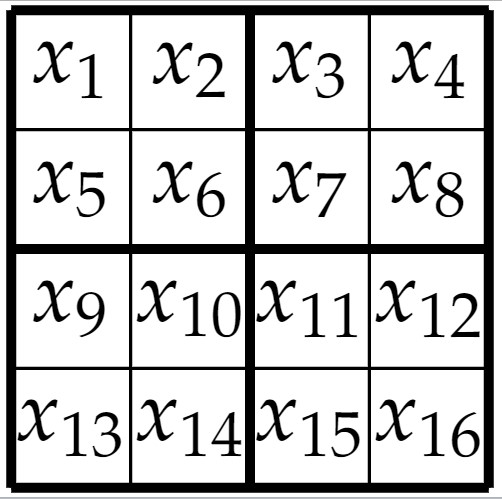

Let's take a row. $x1 + x2 + x3 + x4 = 10$ and $x1x2x3x4  = 24$. We can write these equations for each row, column and $2\times2$ block. Also, each cell of the Shidoku board can be thought of as a variable that can take only values 1,2,3 and 4. $(x1-1)(x1-2)(x1-3)(x1-4) = 0$

In [3]:
for i in range(0,16):
    f[i] = (ls[i]-1)*(ls[i]-2)*(ls[i]-3)*(ls[i] - 4);

k = 0;d = 0;
for j in range(16,24):
    if j<20:
        f[j] = ls[k] + ls[k+1] + ls[k+2] +ls[k+3]-10
        k = k + 4; 
    if j>=20:
        f[j] = ls[d]*ls[d+1]*ls[d+2]*ls[d+3]-24
        d = d + 4;

q=0;p=0;
for a in range(24,32):
    if a<28:
        f[a] = ls[q] + ls[q+4] + ls[q+8] +ls[q+12]-10;
        q = q + 1; 
    if a>=28:
        f[a] = ls[p]*ls[p+4]*ls[p+8]*ls[p+12]-24;
        p = p + 1; 
l=0;
for w in range(32,36):
    if w<34:
        f[w] = ls[l] + ls[l+1] + ls[l+4] +ls[l+5]-10;
        l = l + 2; 
    if w>=34:
        f[w] = ls[l+4] + ls[l+5] + ls[l+8] +ls[l+9]-10;
        l = l + 2;
z=0;
for t in range(36,40):
    if t<38:
        f[t] = ls[z]*ls[z+1]*ls[z+4]*ls[z+5]-24;
        z = z + 2; 
    if t>=38:
        f[t] = ls[z+4]*ls[z+5]*ls[z+8]*ls[z+9]-24;
        z = z + 2;
        


We import the polynomials in $f$. Now, we can generate an ideal with the set of $f$. The ideal $I$ is generated by $f$ on the polynomial ring $R[x_1,x_2,\ldots,x_{16}]$.

In [4]:
I = P.ideal([f[0],f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],f[9],f[10],f[11],f[12],f[13],f[14],f[15],f[16],f[17],f[18],f[19],f[20],f[21],f[22],f[23],f[24],f[25],f[26],f[27],f[28],f[29],f[30],f[31],f[32],f[33],f[34],f[35],f[36],f[37],f[38],f[39]]); I

Ideal (x1^4 - 10*x1^3 - 2*x1^2 - 13*x1 - 13, x2^4 - 10*x2^3 - 2*x2^2 - 13*x2 - 13, x3^4 - 10*x3^3 - 2*x3^2 - 13*x3 - 13, x4^4 - 10*x4^3 - 2*x4^2 - 13*x4 - 13, x5^4 - 10*x5^3 - 2*x5^2 - 13*x5 - 13, x6^4 - 10*x6^3 - 2*x6^2 - 13*x6 - 13, x7^4 - 10*x7^3 - 2*x7^2 - 13*x7 - 13, x8^4 - 10*x8^3 - 2*x8^2 - 13*x8 - 13, x9^4 - 10*x9^3 - 2*x9^2 - 13*x9 - 13, x10^4 - 10*x10^3 - 2*x10^2 - 13*x10 - 13, x11^4 - 10*x11^3 - 2*x11^2 - 13*x11 - 13, x12^4 - 10*x12^3 - 2*x12^2 - 13*x12 - 13, x13^4 - 10*x13^3 - 2*x13^2 - 13*x13 - 13, x14^4 - 10*x14^3 - 2*x14^2 - 13*x14 - 13, x15^4 - 10*x15^3 - 2*x15^2 - 13*x15 - 13, x16^4 - 10*x16^3 - 2*x16^2 - 13*x16 - 13, x1 + x2 + x3 + x4 - 10, x5 + x6 + x7 + x8 - 10, x9 + x10 + x11 + x12 - 10, x13 + x14 + x15 + x16 - 10, x1*x2*x3*x4 + 13, x5*x6*x7*x8 + 13, x9*x10*x11*x12 + 13, x13*x14*x15*x16 + 13, x1 + x5 + x9 + x13 - 10, x2 + x6 + x10 + x14 - 10, x3 + x7 + x11 + x15 - 10, x4 + x8 + x12 + x16 - 10, x1*x5*x9*x13 + 13, x2*x6*x10*x14 + 13, x3*x7*x11*x15 + 13, x4*x8*x12*x16

Now, we ready to compute the Gröbner bases. The below code finds the minimal ideal because there are no constraints right now. 

In [5]:
K = I.groebner_basis(); K 

[x1 - 17*x7*x12*x14*x15^2*x16^2 + 11*x7*x12*x14*x15^2*x16 - 14*x7*x12*x14*x15^2 + 11*x7*x12*x14*x15*x16^2 + 18*x7*x12*x14*x15*x16 + 17*x7*x12*x14*x15 - 14*x7*x12*x14*x16^2 + 17*x7*x12*x14*x16 - 17*x7*x12*x14 - 13*x7*x12*x15^2*x16^2 + 9*x7*x12*x15^2*x16 - 10*x7*x12*x15^2 + 9*x7*x12*x15*x16^2 - 3*x7*x12*x15*x16 + 3*x7*x12*x15 - 10*x7*x12*x16^2 + 3*x7*x12*x16 + 15*x7*x12 - 13*x7*x14*x15^2*x16^2 + 9*x7*x14*x15^2*x16 - 10*x7*x14*x15^2 + 9*x7*x14*x15*x16^2 - 3*x7*x14*x15*x16 + 3*x7*x14*x15 - 10*x7*x14*x16^2 + 3*x7*x14*x16 + 15*x7*x14 - 14*x7*x15^2*x16^2 + 17*x7*x15^2*x16 - 17*x7*x15^2 + 17*x7*x15*x16^2 + 6*x7*x15*x16 - 7*x7*x15 - 17*x7*x16^2 - 7*x7*x16 - 14*x7 + 17*x8*x10*x12*x15^2*x16^2 - 11*x8*x10*x12*x15^2*x16 + 14*x8*x10*x12*x15^2 + 17*x8*x10*x12*x15*x16^3 - 9*x8*x10*x12*x15*x16^2 - 15*x8*x10*x12*x15*x16 - 2*x8*x10*x12*x15 + 13*x8*x10*x12*x16^3 + 18*x8*x10*x12*x16^2 - 14*x8*x10*x12*x16 + 14*x8*x10*x12 + 13*x8*x10*x15^2*x16^2 - 9*x8*x10*x15^2*x16 + 10*x8*x10*x15^2 + 13*x8*x10*x15*x16^3 - 

Now, we get the minimal ideal that contains the Gröbner basis. Also, we reduce 40 polynomials to 17 polynomials. 